<a href="https://colab.research.google.com/github/sherlockieee/cs166/blob/main/session_15/CS166_PCW_Session_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

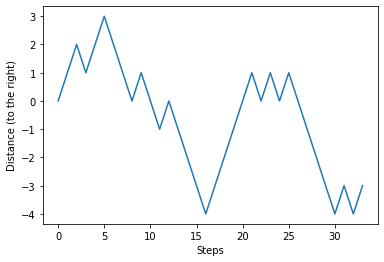

None


In [27]:
import random
import numpy as np
import matplotlib.pyplot as plt


class Coin:
    HEAD = "head"
    TAIL = "tail"
    def __init__(self, p_head, special_condition = None):
        self.p_head = p_head
        self.special_condition = special_condition
    
    def toss_coin(self):
        return self.HEAD if random.random() < self.p_head else self.TAIL


    def random_walk(self, steps):
        dist_arr = [0]
        dist = 0
        for i in range(steps):
            if self.toss_coin() == self.HEAD:
                dist_arr.append(dist_arr[-1] + 1)
                dist += 1
            else:
                dist_arr.append(dist_arr[-1] - 1)
                dist -= 1
            if self.special_condition is None:
                continue
            dist_arr, dist = self.special_condition(dist_arr, dist)
            

        return dist_arr, dist

    def plot_random_walk(self, steps):
        dist_arr, final_dist = self.random_walk(steps)
        plt.plot(dist_arr)
        plt.xlabel("Steps")
        plt.ylabel("Distance (to the right)")
        plt.show()
        



def reflection_barrier(dist_arr, dist):
    if dist == -4:
        dist_arr.append(-3)
        dist = -3
    return dist_arr, dist

def partial_block(dist_arr, dist):
    if dist == 6:
        if random.random() < 0.75:
            dist = 5
            dist_arr.append(5)
        else:
            dist = 7
            dist_arr.append(7)
    return dist_arr, dist

coin = Coin(0.5, special_condition = reflection_barrier)
print(coin.plot_random_walk(30))


In [31]:
def sample(n = 10000, steps = 100, p_head = 0.5, special_condition = None):
    coin = Coin(p_head, special_condition)
    distance_arr = []
    for rep in range(n):
        dist = coin.random_walk(steps)[1]
        distance_arr.append(dist)
    
    mean = np.mean(distance_arr)
    var = np.var(distance_arr)
    plt.hist(distance_arr)
    
    plt.title(f"Histogram of final locations")
    plt.ylabel("Frequency")
    plt.xlabel("Distance")
    plt.show()

    return mean, var

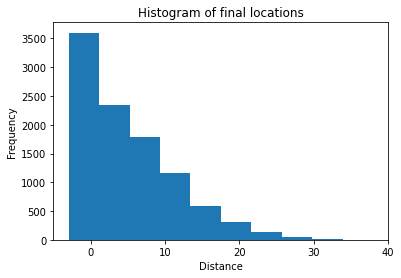

(4.9708, 41.19894736)

In [32]:
sample(special_condition = reflection_barrier)


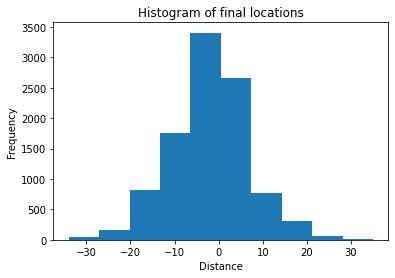

(-2.0877, 77.08240871000001)

In [33]:
sample(special_condition = partial_block)